In [175]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [176]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


In [177]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Unnamed: 12,Unnamed: 13
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,0.0,0.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,NaN,NaN
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,NaN,NaN


In [178]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12',
       'Unnamed: 13'], dtype=object)

In [179]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [180]:
#Null values
total = train_df.isnull().sum().sort_values(ascending = False)
perc = train_df.isnull().sum()/train_df.isnull().count()*100
formperc = round(perc, 1).sort_values(ascending = False)
missing_values = pd.concat([total, formperc], axis = 1, keys= ['Total', '%'])
missing_values.head(5)

,Total,%
Unnamed: 12,891,100.0
Unnamed: 13,891,100.0
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


<AxesSubplot:xlabel='Age', ylabel='Count'>

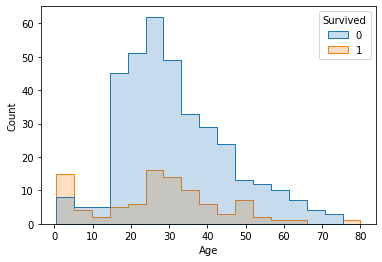

In [181]:
men = train_df[train_df['Sex'] == 'male']
sns.histplot(men, x="Age", hue="Survived", element="step")

<AxesSubplot:xlabel='Age', ylabel='Count'>

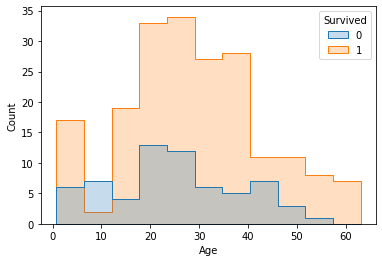

In [182]:
women = train_df[train_df['Sex'] == 'female']
sns.histplot(women, x="Age", hue="Survived", element="step")

In [183]:
#preprocessing
train_df = train_df.drop('Cabin', axis = 1)
train_df['Age'] = train_df['Age'].fillna('M')

In [184]:
y = train_df["Survived"]

from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

features = ["Pclass", "Sex", "SibSp", "Parch"]
train_df['Sex'] = le_sex.fit_transform(train_df['Sex'])
X = train_df[features]
test_df['Sex'] = le_sex.fit_transform(test_df['Sex'])
X_test = test_df[features]

In [185]:
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_over,y_over)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7821229050279329


In [186]:
import joblib
joblib.dump(rf, 'titanic_rf_model.pkl')

['titanic_rf_model.pkl']